In [4]:
%pip install -q matplotlib pandas tqdm m2stitch
%pip install -q --upgrade basicpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


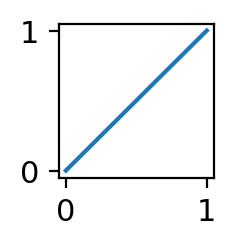

In [3]:
from basicpy import BaSiC, datasets, metrics
from matplotlib import pyplot as plt
import numpy as np
from hyperactive import Hyperactive
import pandas as pd
from m2stitch import stitch_images

plt.rcParams["font.family"] = ""
plt.figure(figsize=(1, 1))
plt.plot(range(2))

In [2]:
brain_wsi_image = datasets.wsi_brain()

In [3]:
brain_wsi_image.shape

(63, 128, 128)

In [4]:
def compose_image(img):
    img_composed = np.empty(
        (
            img.shape[1] * 7,
            img.shape[2] * 9,
        )
    )

    y = 0
    x = img.shape[2] * 8

    rows = []
    cols = []
    for j, im in enumerate(img):
        img_composed[y : y + img.shape[1], x : x + img.shape[2]] = im
        rows.append(y // img.shape[1])
        cols.append(x // img.shape[2])
        if (y // img.shape[2]) % 2 == 0:
            x -= img.shape[2]
            if x < 0:
                x = 0
                y += img.shape[1]
        else:
            x += img.shape[2]
            if x > img.shape[2] * 8:
                x = img.shape[2] * 8
                y += img.shape[1]
    return img_composed, rows, cols

findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic'

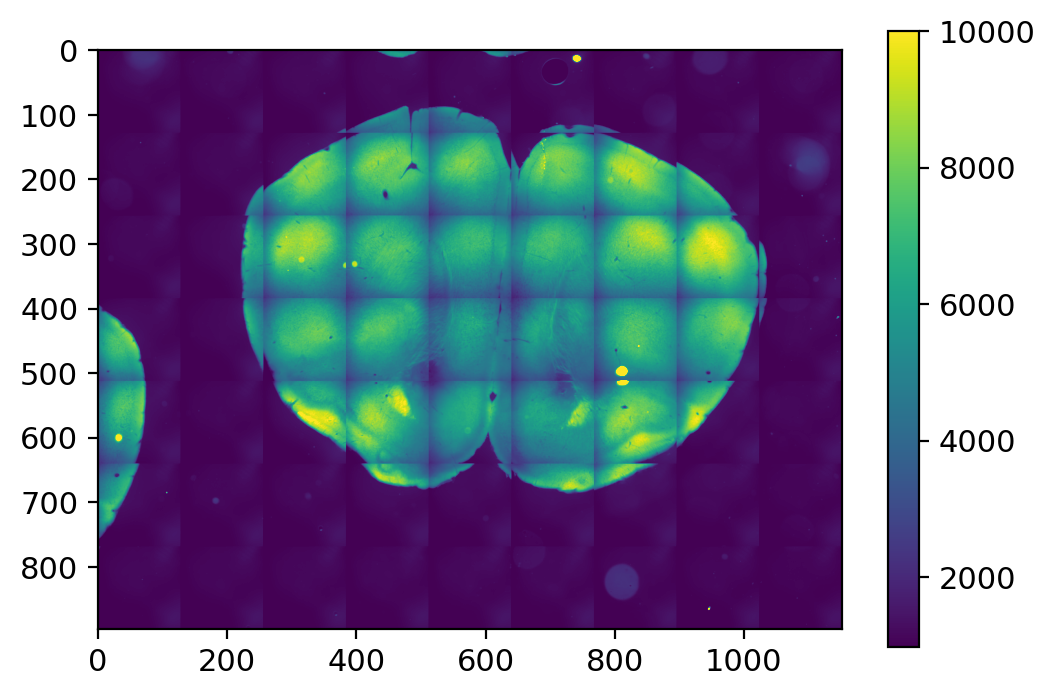

In [5]:
composed, rows, cols = compose_image(brain_wsi_image)
plt.imshow(composed, vmin=970, vmax=10000)
plt.colorbar()

In [6]:
basic = BaSiC(
    get_darkfield=True,
)

In [7]:
print(
    basic.smoothness_flatfield, basic.smoothness_darkfield, basic.sparse_cost_darkfield
)

1.0 1.0 0.01


findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic'

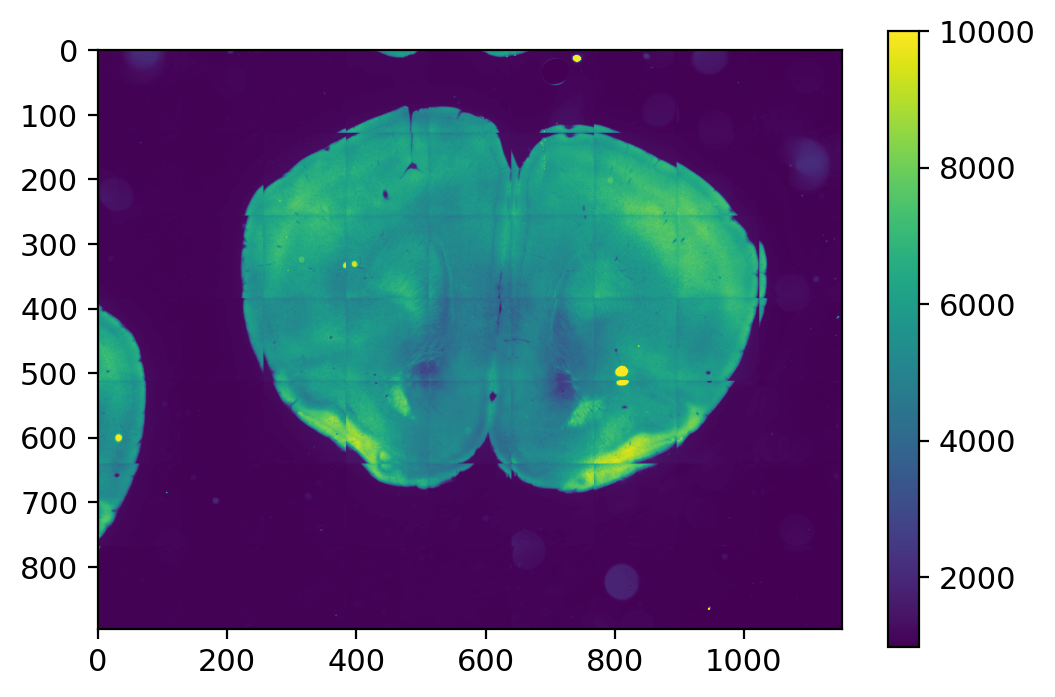

In [8]:
transformed1 = basic.fit_transform(brain_wsi_image)
composed, rows, cols = compose_image(transformed1)
plt.imshow(composed, vmin=970, vmax=10000)
plt.colorbar()

In [9]:
basic.autotune(brain_wsi_image, early_stop=True, n_iter=100)

[0] fit_and_calc_entropy (Hill Climbing):  35%|───       | 35/100 [04:47<08:54,  8.22s/it, best_iter=0, best_pos=[3 5 8], best_score=-7.182083689506224]



Results: 'fit_and_calc_entropy'  
   Best score: -7.182083689506224  
   Best parameter set:
      'smoothness_flatfield'  : 0.004281332398719396  
      'smoothness_darkfield'  : 0.0069519279617756054  
      'sparse_cost_darkfield' : 0.029763514416313176  
   Best iteration: 0  
 
   Random seed: 374754321  
 
   Evaluation time   : 287.5858154296875 sec    [100.0 %]
   Optimization time : 0.013123512268066406 sec    [0.0 %]
   Iteration time    : 287.59893894195557 sec    [2.88 sec/iter]
 


In [10]:
print(
    basic.smoothness_flatfield, basic.smoothness_darkfield, basic.sparse_cost_darkfield
)

0.004281332398719396 0.0069519279617756054 0.029763514416313176


findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic'

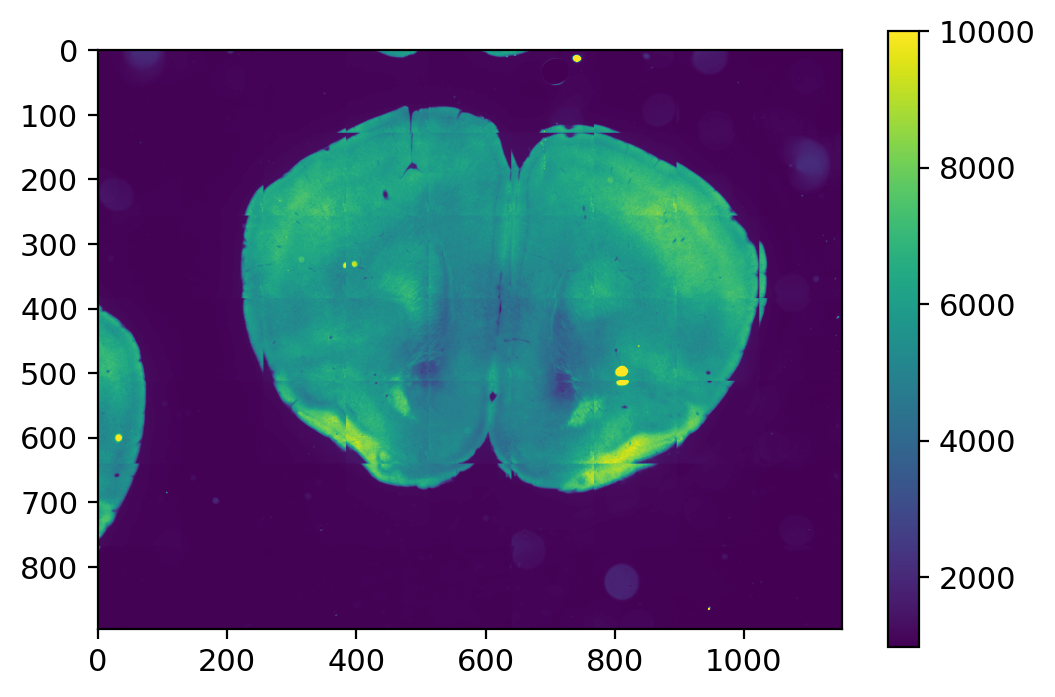

In [11]:
transformed2 = basic.fit_transform(brain_wsi_image)
composed, rows, cols = compose_image(transformed2)
plt.imshow(composed, vmin=970, vmax=10000)
plt.colorbar()

In [12]:
df, props = stitch_images(
    transformed1, rows, cols, row_col_transpose=False, ncc_threshold=0.2
)

100%|██████████| 63/63 [00:00<00:00, 1154.27it/s]


In [13]:
stitched_images = []

for image in [brain_wsi_image, transformed1, transformed2]:
    stitched_image = np.zeros(
        (
            image.shape[1] + df["y_pos"].max(),
            image.shape[2] + df["x_pos"].max(),
        )
    )
    for (_, row), im in zip(df.iterrows(), image):
        stitched_image[
            row["y_pos"] : row["y_pos"] + im.shape[0],
            row["x_pos"] : row["x_pos"] + im.shape[1],
        ] = im
    stitched_images.append(stitched_image)

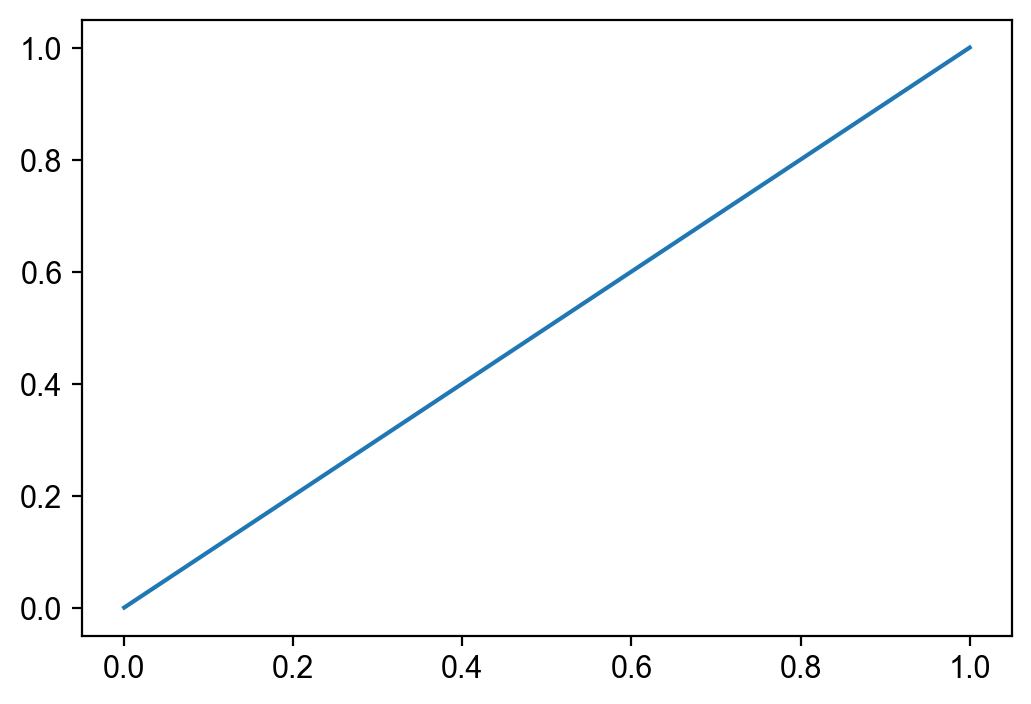

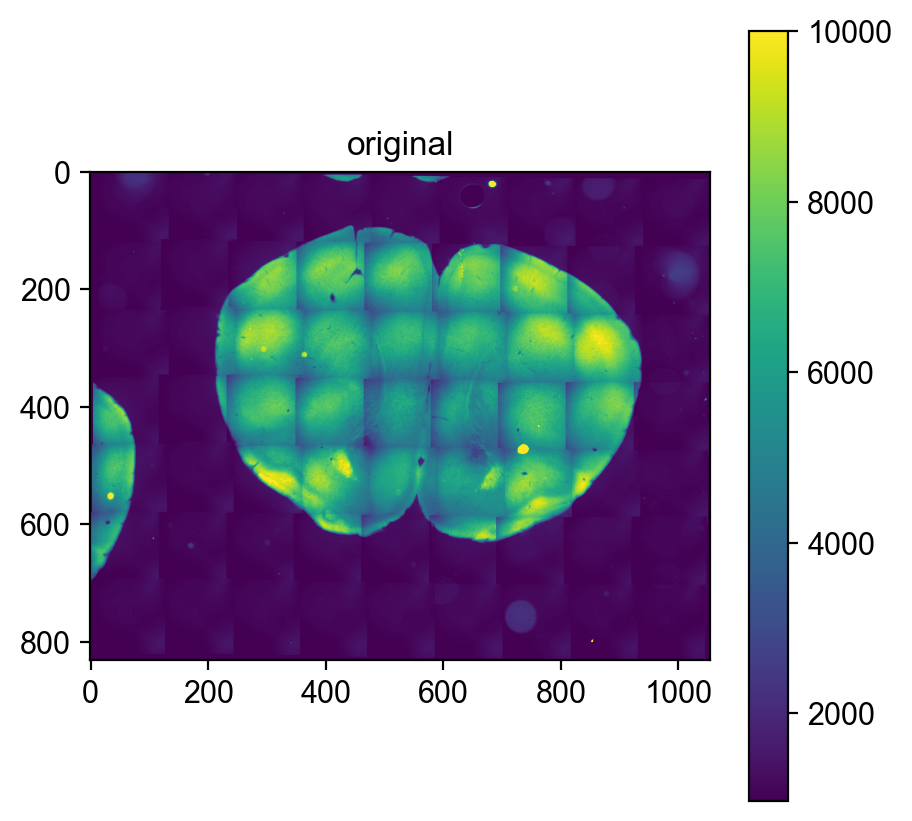

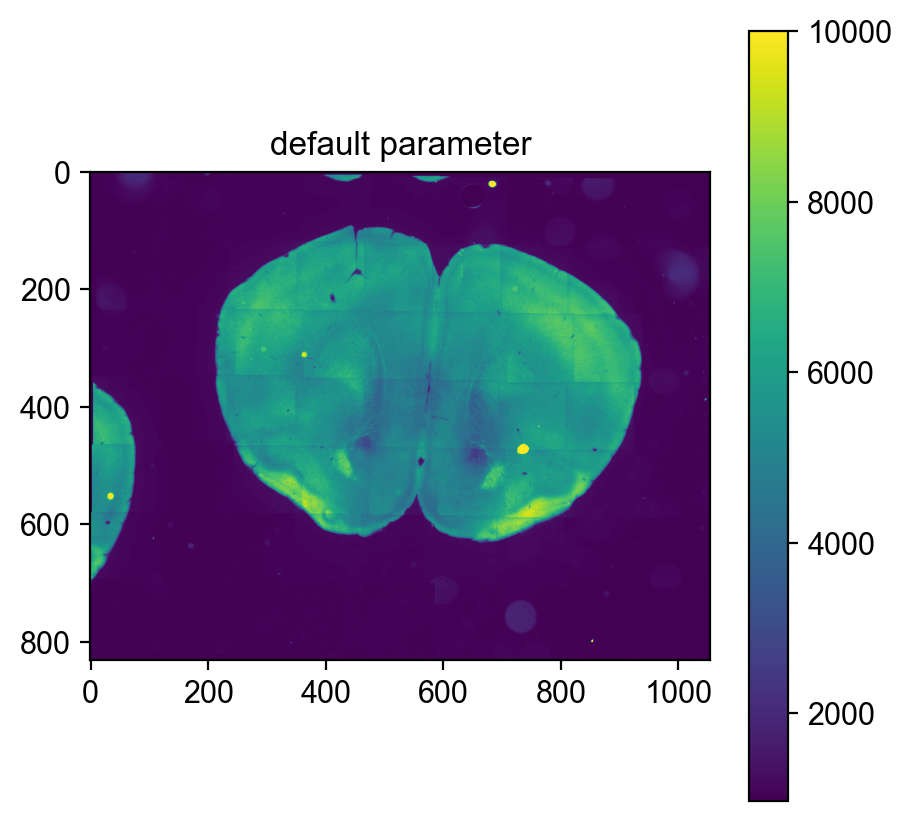

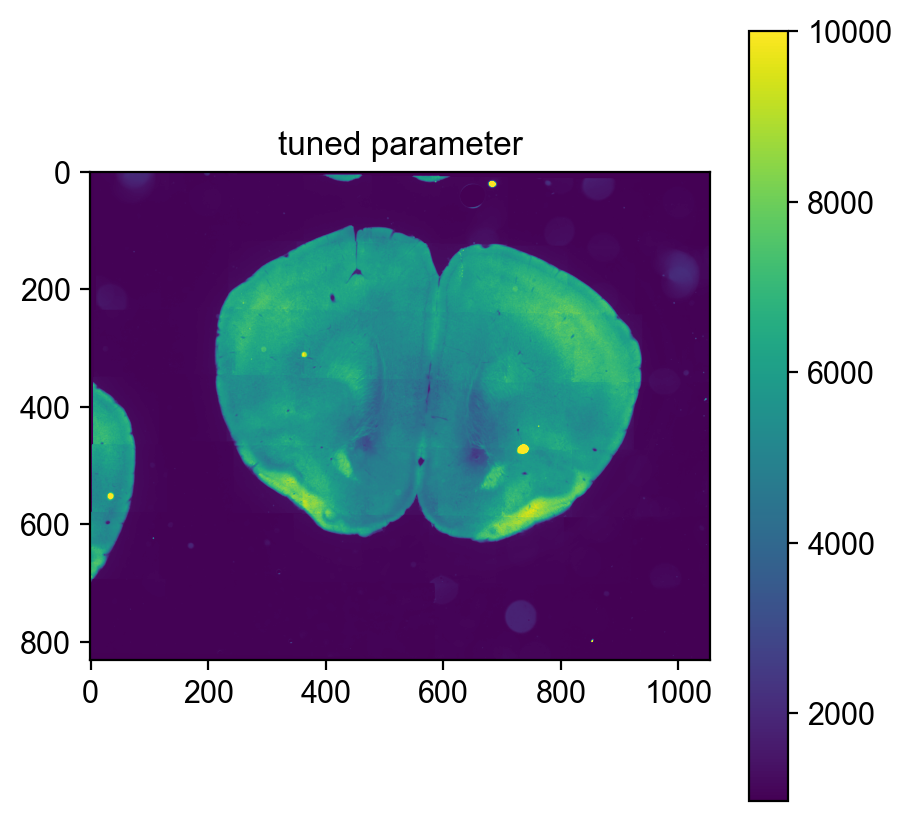

In [18]:
for name, stitched_image in zip(
    ["original", "default parameter", "tuned parameter"], stitched_images
):
    plt.figure(figsize=(5, 5))
    plt.title(name)
    plt.imshow(stitched_image, vmin=970, vmax=10000)
    plt.colorbar()

In [5]:
basic = BaSiC(
    get_darkfield=True,
)
image = datasets.timelapse_brightfield()
basic.autotune(image, early_stop=True, n_iter=100)
basic.fit(image)

[0] fit_and_calc_entropy (Hill Climbing):   0%|          | 0/100 [00:00<?, ?it/s]

cell_culture


Reweighting did not converge.


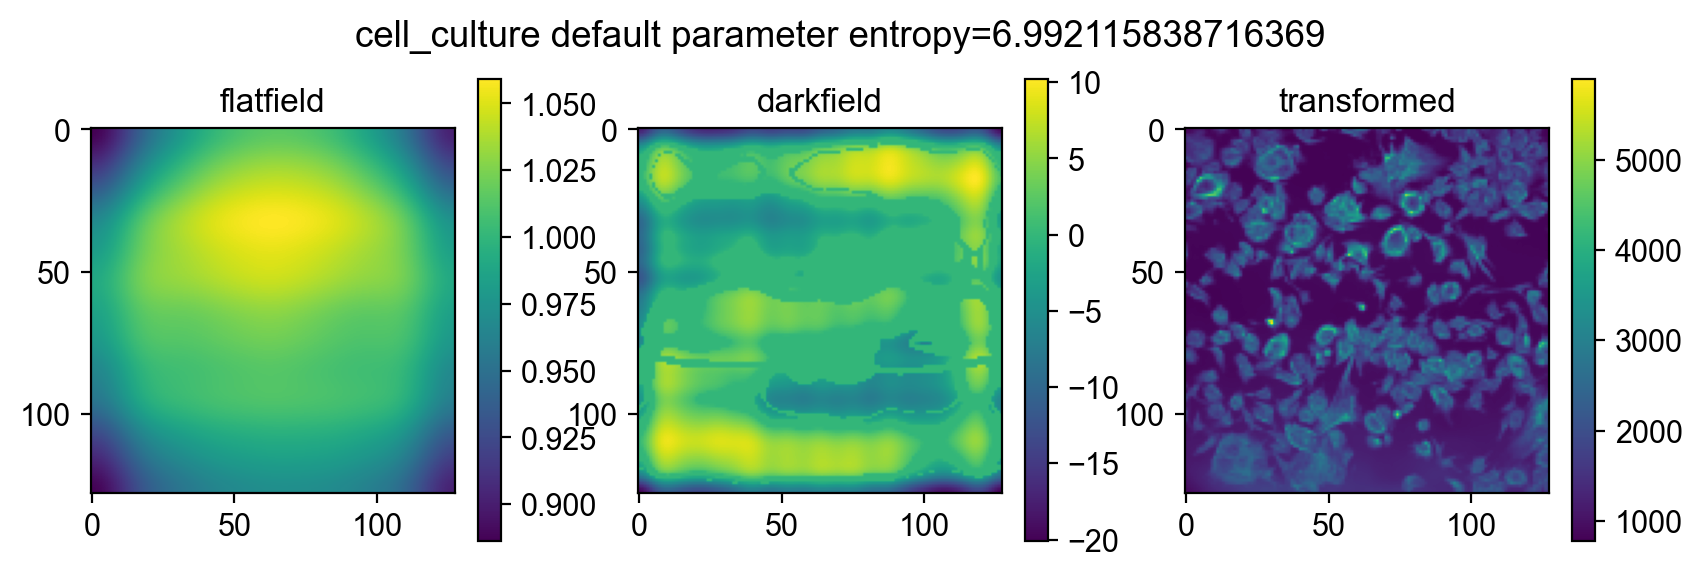

Reweighting did not converge.
[0] fit_and_calc_entropy (Hill Climbing):  37%|───       | 37/100 [17:42<30:09, 28.72s/it, best_iter=0, best_pos=[ 8  3 10], best_score=-7.054865939542269]




Results: 'fit_and_calc_entropy'  
   Best score: -7.054865939542269  
   Best parameter set:
      'smoothness_flatfield'  : 0.04832930238571752  
      'smoothness_darkfield'  : 0.0026366508987303583  
      'sparse_cost_darkfield' : 0.07847599703514611  
   Best iteration: 0  
 
   Random seed: 1140877637  
 
   Evaluation time   : 1062.5558948516846 sec    [100.0 %]
   Optimization time : 0.009096145629882812 sec    [0.0 %]
   Iteration time    : 1062.5649909973145 sec    [10.63 sec/iter]
 


Reweighting did not converge.


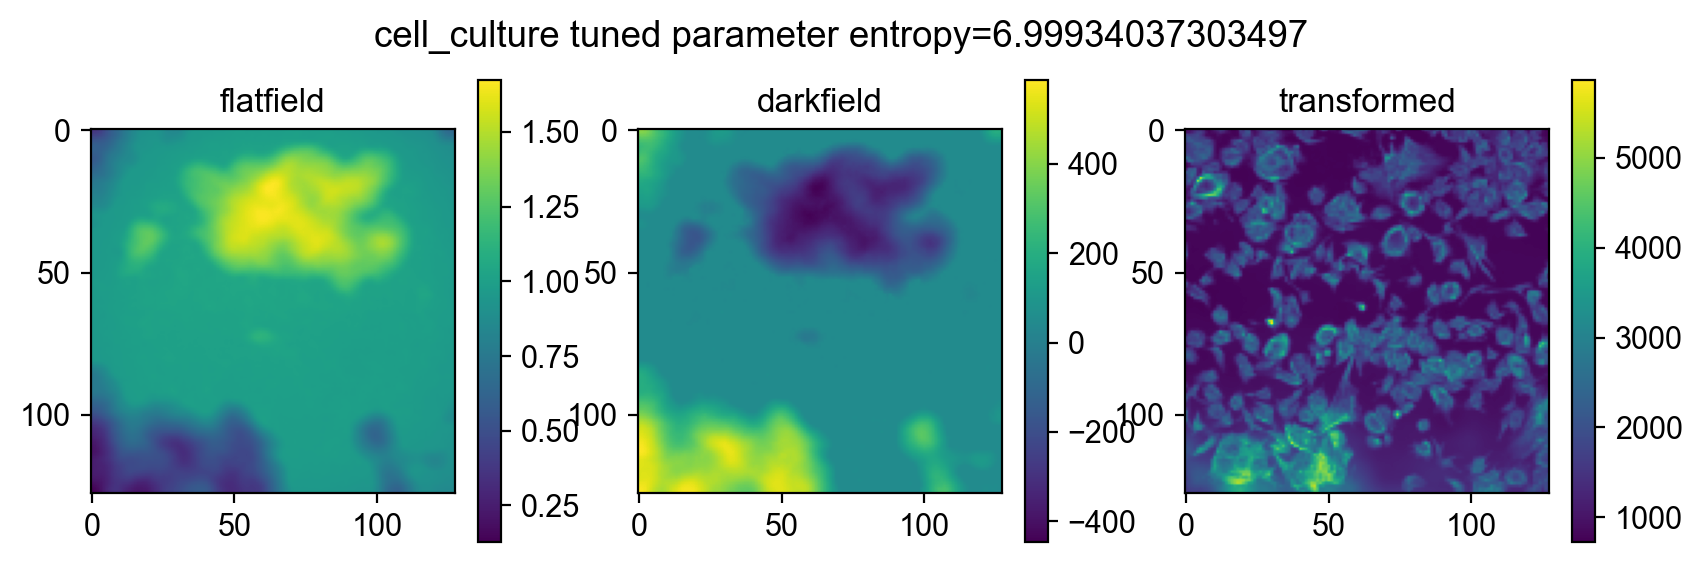

timelapse_brightfield


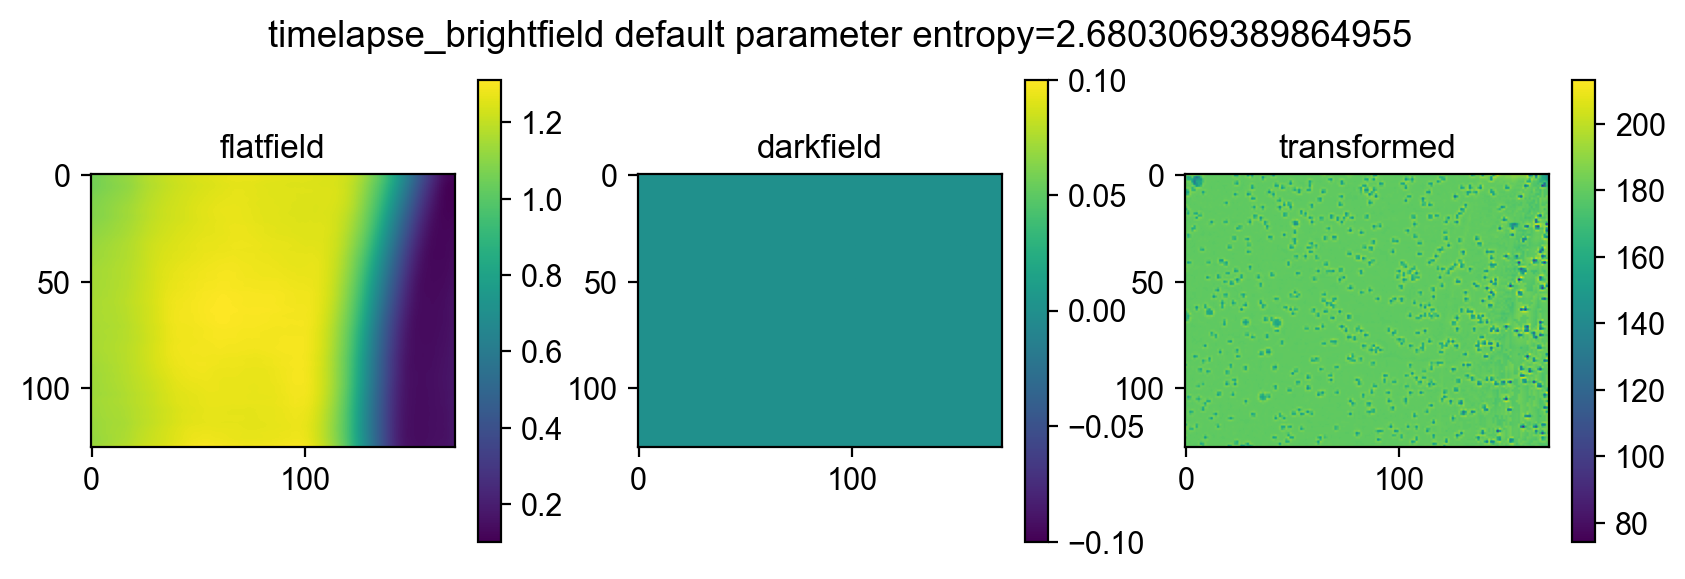

[0] fit_and_calc_entropy (Hill Climbing):   0%|          | 0/100 [00:14<?, ?it/s]


timelapse_nanog


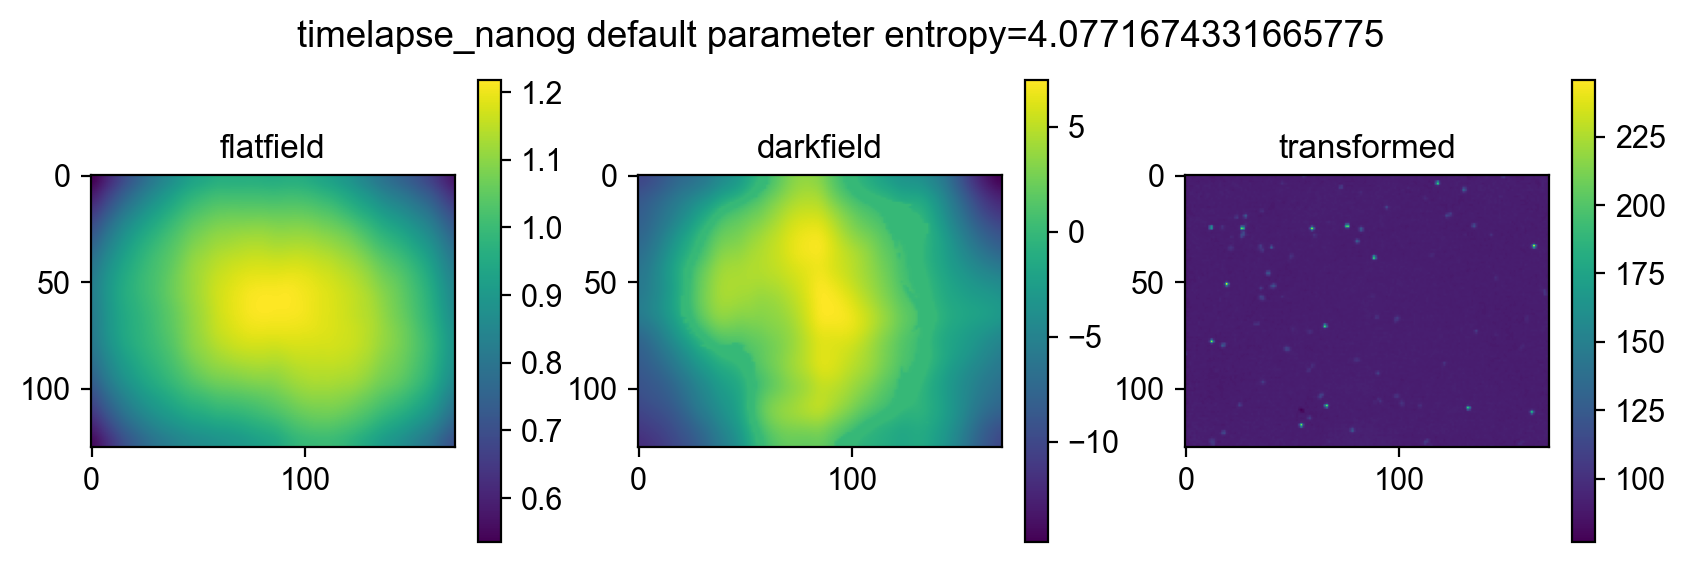

[0] fit_and_calc_entropy (Hill Climbing):  24%|──        | 24/100 [14:22<45:29, 35.92s/it, best_iter=0, best_pos=[3 0 1], best_score=-4.007945279853925]


timelapse_pu1



Reweighting did not converge.


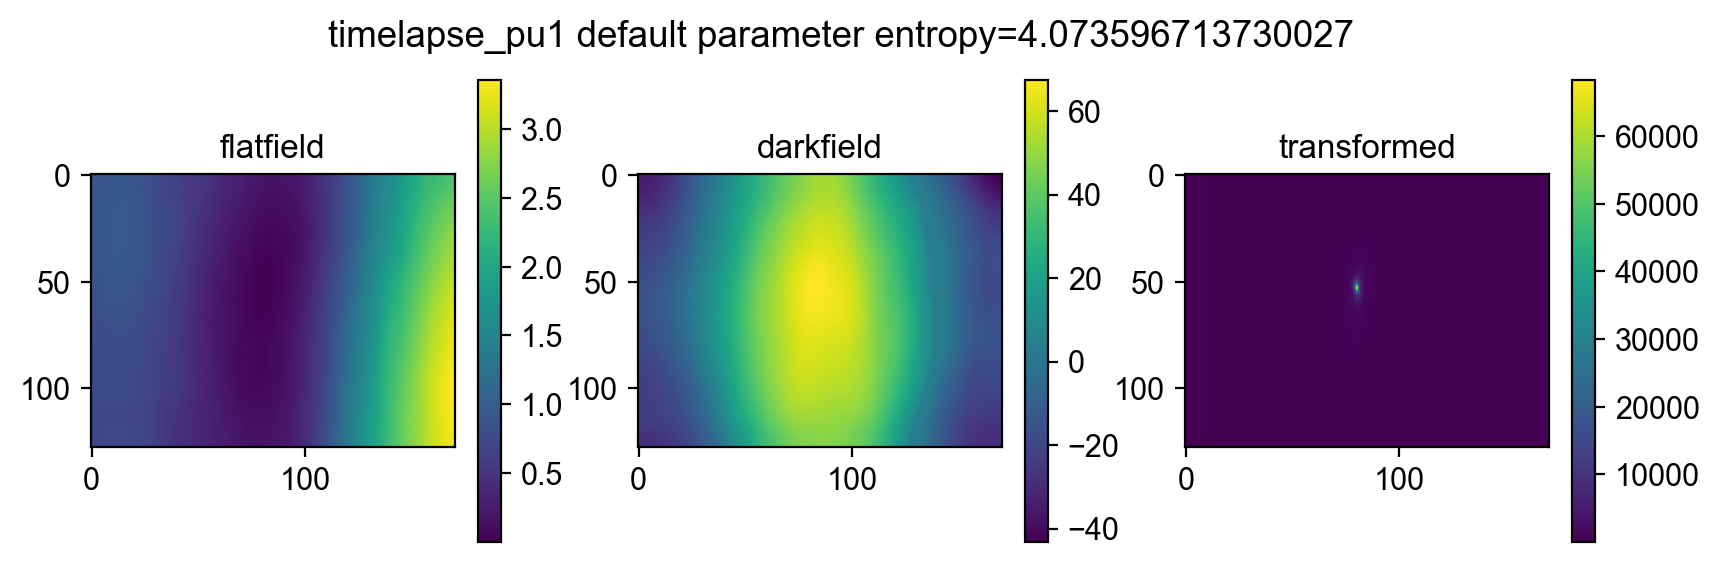

Single-step optimization did not converge at the last reweighting step.
[0] fit_and_calc_entropy (Hill Climbing):   1%|          | 1/100 [01:28<2:26:01, 88.50s/it, best_iter=0, best_pos=[9 1 1], best_score=-4.26984535223235]Reweighting did not converge.
Single-step optimization did not converge at the last reweighting step.
[0] fit_and_calc_entropy (Hill Climbing):   2%|          | 2/100 [04:53<4:16:43, 157.18s/it, best_iter=0, best_pos=[9 1 1], best_score=-4.26984535223235]Reweighting did not converge.
Single-step optimization did not converge at the last reweighting step.
[0] fit_and_calc_entropy (Hill Climbing):   5%|          | 5/100 [10:32<2:46:56, 105.44s/it, best_iter=0, best_pos=[6 2 5], best_score=-3.9328723742172462]Reweighting did not converge.
Single-step optimization did not converge at the last reweighting step.
[0] fit_and_calc_entropy (Hill Climbing):  10%|─         | 10/100 [22:22<2:46:19, 110.89s/it, best_iter=0, best_pos=[19  5 18], best_score=-3.812281816309889]Rewe



Results: 'fit_and_calc_entropy'  
   Best score: -3.664611345617712  
   Best parameter set:
      'smoothness_flatfield'  : 3.792690190732246  
      'smoothness_darkfield'  : 0.001  
      'sparse_cost_darkfield' : 0.07847599703514611  
   Best iteration: 0  
 
   Random seed: 1751992505  
 
   Evaluation time   : 3225.0920107364655 sec    [100.0 %]
   Optimization time : 0.014878511428833008 sec    [0.0 %]
   Iteration time    : 3225.1068892478943 sec    [32.25 sec/iter]
 


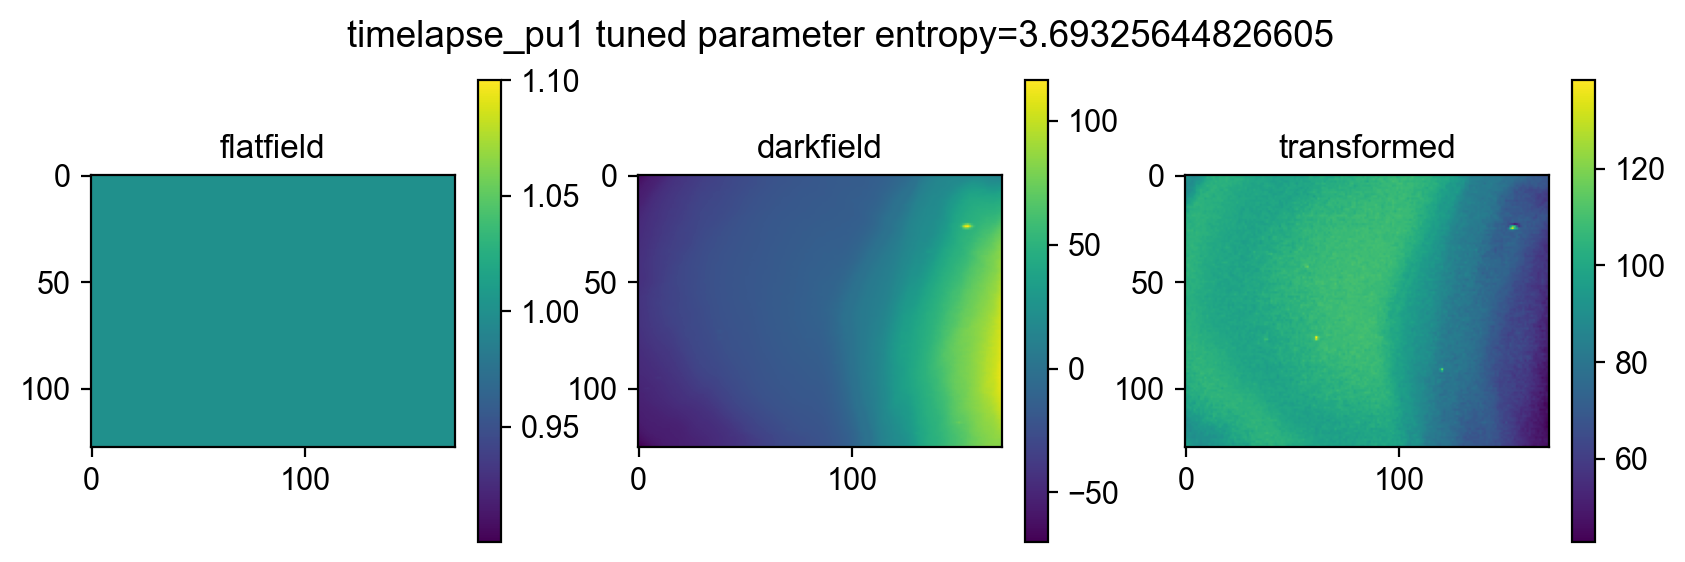

In [19]:
def show_results(basic, image, title):
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.title("flatfield")
    plt.imshow(basic.flatfield)
    plt.colorbar()
    plt.subplot(1, 3, 2)
    plt.title("darkfield")
    plt.imshow(basic.darkfield)
    plt.colorbar()
    plt.subplot(1, 3, 3)
    plt.title("transformed")
    plt.imshow(basic.transform(image)[10])
    plt.colorbar()
    plt.suptitle(title)
    plt.show()


images = {
    "cell_culture": datasets.cell_culture(),
    "timelapse_brightfield": datasets.timelapse_brightfield(),
    "timelapse_nanog": datasets.timelapse_nanog(),
    "timelapse_pu1": datasets.timelapse_pu1(),
}

for name, image in images.items():

    try:
        print(name)
        basic = BaSiC(
            get_darkfield=True,
        )
        basic.fit(image)
        vmin, vmax = np.quantile(image, [0.01, 0.99])
        transformed = basic.transform(image)
        show_results(
            basic,
            image,
            f"{name} default parameter entropy={metrics.entropy(transformed,vmin=vmin,vmax=vmax)}",
        )

        basic.autotune(image, early_stop=True, n_iter=100)
        basic.fit(image)
        transformed = basic.transform(image)
        show_results(
            basic,
            image,
            f"{name} tuned parameter entropy={metrics.entropy(transformed,vmin=vmin,vmax=vmax)}",
        )
    except AssertionError as e:
        print(e)
        pass